<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_7/TidyTuesday_Student_Debt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skills I learned


*   I can use a list of colors as a palette in `seaborn` rather than a dictionary 
*   The rightmost gridline from `ax.grid()` is cut off when I remove all the spines
* I can change the size of points in a `seaborn` legend



# Packages and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-09/student_debt.csv')

df.head()

,year,race,loan_debt,loan_debt_pct
0,2016,White,11108.410,0.336751
1,2016,Black,14224.770,0.418359
2,2016,Hispanic,7493.999,0.218969
3,2013,White,8363.605,0.284555
4,2013,Black,10302.660,0.412277


# Plotting

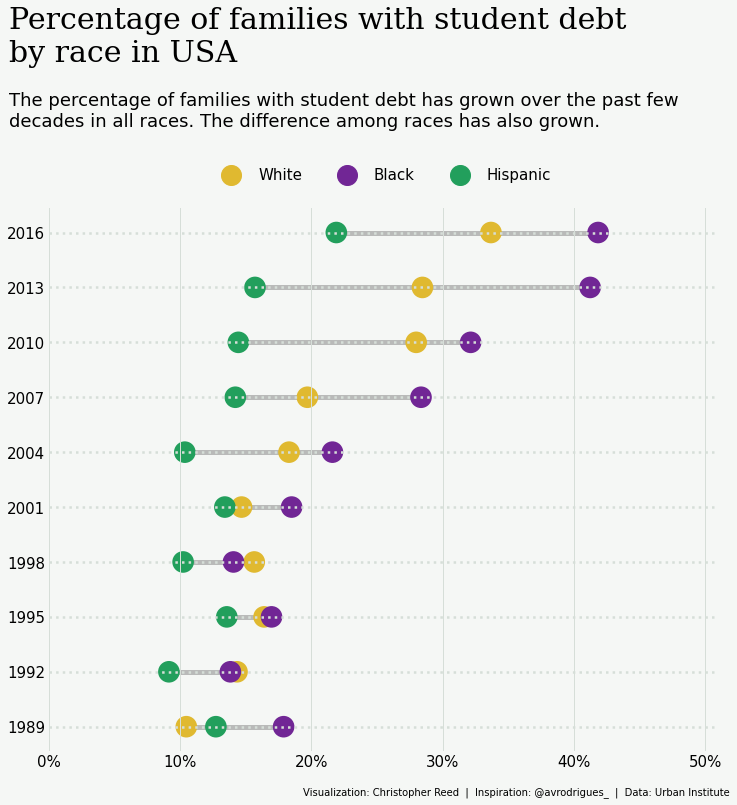

In [5]:
line_palette = ['#b9bab9'] * len(df['year'].unique())
scatter_palette = {'White':'#e0b930',
                   'Black':'#712695',
                   'Hispanic':'#229f5c'}

fig, ax = plt.subplots(figsize = (12, 10))

###########################
## LINE AND SCATTER PLOT ##
###########################

sns.lineplot(x = 'loan_debt_pct',
             y = 'year',
             hue = 'year',
             data = df,
             ax = ax,
             palette = line_palette,
             linewidth = 5,
             zorder = -1,
             legend = False)

sns.scatterplot(x = 'loan_debt_pct',
                y = 'year',
                hue = 'race',
                data = df,
                ax = ax,
                s = 400,
                palette = scatter_palette,
                edgecolor = None)

##########################
## TITLES AND AX LABELS ##
##########################

ax.text(x = -0.06, y = 1.27,
        s = 'Percentage of families with student debt\nby race in USA',
        fontsize = 30,
        transform = ax.transAxes,
        family = 'Serif')

desc = 'The percentage of families with student debt has grown over the past few\ndecades in all races. The difference among races has also grown.'
ax.text(x = -0.06, y = 1.15,
        s = desc,
        fontsize = 18,
        transform = ax.transAxes)

ax.set_xlabel('')
ax.set_ylabel('')

############
## LEGEND ##
############

# Custom Seaborn legends are always a bit tricky...
# Grab the legend handles from ax
legend_labels, _= ax.get_legend_handles_labels()

# Use them to create own legend in normal matplotlib style
lgnd = ax.legend(legend_labels, ['White', 'Black', 'Hispanic'], 
          bbox_to_anchor=(0.5,1.1),
          frameon = False,
          loc = 'upper center',
          ncol = 3,
          prop = {'size':15})

# Make points bigger in legend
lgnd.legendHandles[0]._sizes = [400]
lgnd.legendHandles[1]._sizes = [400]
lgnd.legendHandles[2]._sizes = [400]

#####################
## TICK FORMATTING ##
#####################

# Labelsize and tick length
ax.tick_params(axis = 'both',
               labelsize = 15,
               length = 0)

# X axis limits (0% to 50%)
ax.set_xlim(left = 0,
            right = 0.5)

# Y tick for each year in df
ax.set_yticks(df['year'].unique())

# Hack the xtick labels so that the right most vertical grid line is visible
# If I used ax.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format)) the right most gridline was cutoff (sad)
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.51])
ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%', ''])

#####################
## GRID AND SPINES ##
#####################

ax.grid(axis = 'y',
        ls = ':',
        lw = 2.5,
        zorder = 1,
        color = '#d6ded8')

ax.grid(axis = 'x',
        lw = 1,
        zorder = -1,
        color = '#d6ded8')

for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(False)

#############
## CREDITS ##
#############

ax.text(x = 0.38, y = -0.08,
        s = 'Visualization: Christopher Reed  |  Inspiration: @avrodrigues_  |  Data: Urban Institute',
        transform = ax.transAxes)

#######################
## BACKGROUND COLORS ##
#######################

ax.set_facecolor('#f5f7f5')
fig.set_facecolor('#f5f7f5')

plt.savefig('Student Debt Low Res', facecolor = '#f5f7f5', bbox_inches = 'tight')